## Make some visualizations for the tempo and tonnetz data

In [35]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
style.use('seaborn')
rcParams['figure.figsize'] = (20, 20)


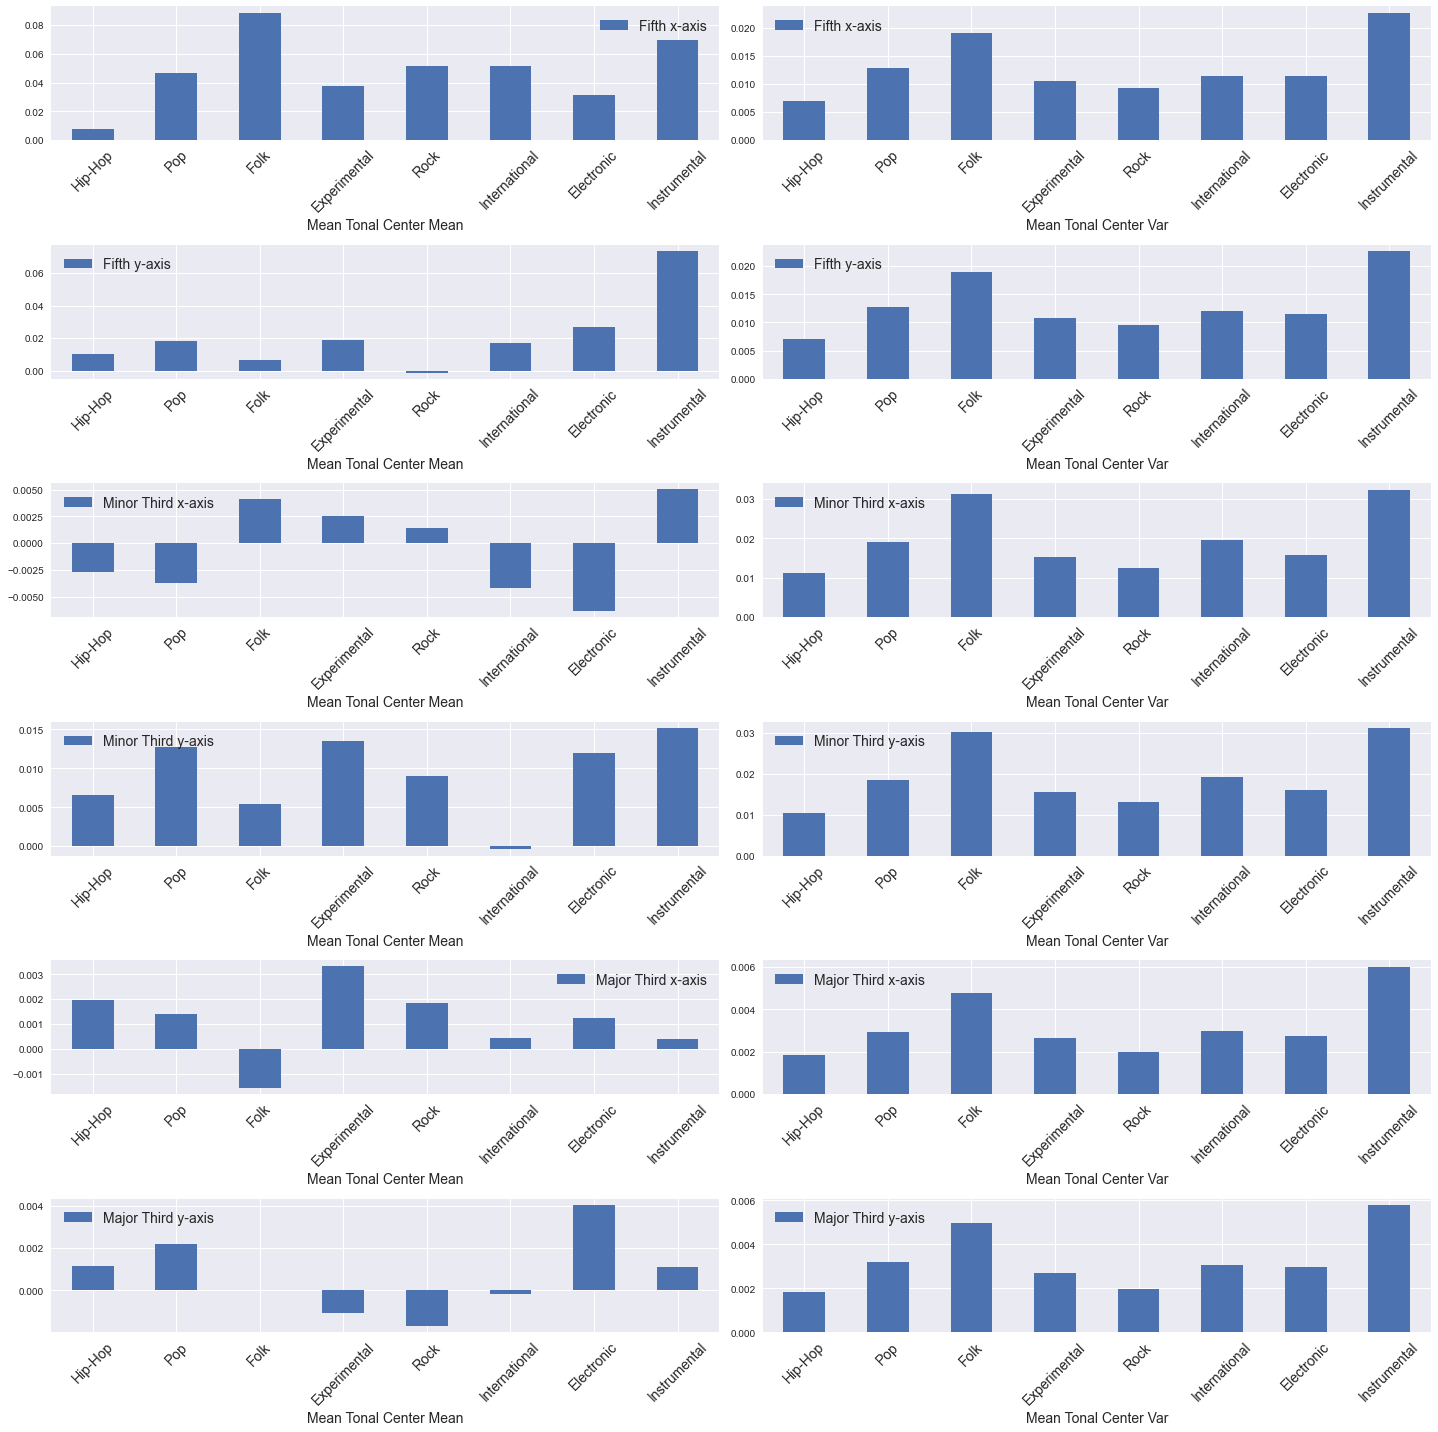

In [38]:
# Load the data and get the labels
data = pd.read_csv('./../data/features.csv')

# Save the genre labels
genre_labels = ["Hip-Hop", "Pop", "Folk", "Experimental", "Rock", "International", "Electronic", "Instrumental"]
tonnetz_labels = ['Fifth x-axis', 'Fifth y-axis', 'Minor Third x-axis', 'Minor Third y-axis', 'Major Third x-axis', 'Major Third y-axis']

# Get the tonnetz features in their own dataframe and group by genre
tonnetz_features = data[['genre_code', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4', 'tonnetz5', 'tonnetz6', 'tonnetz7', 'tonnetz8', 'tonnetz9', 'tonnetz10', 'tonnetz11', 'tonnetz12']]    
group = tonnetz_features.groupby('genre_code')

# Make some bar plots
fig1, axes1 = plt.subplots(6, 2)
for k in range(12):
    group.mean()['tonnetz' + str(k+1)].plot(kind='bar', ax=axes1.reshape(-1)[k], legend=True)
    axes1.reshape(-1)[k].set_xticks([x for x in range(8)])
    axes1.reshape(-1)[k].set_xticklabels(genre_labels, rotation=45, fontsize=14)
    if k % 2 == 0:
        axes1.reshape(-1)[k].set_xlabel('Mean Tonal Center Mean', fontsize=14)
        axes1.reshape(-1)[k].legend([tonnetz_labels[k//2]], fontsize=14)
    else:
        axes1.reshape(-1)[k].set_xlabel('Mean Tonal Center Var', fontsize=14)
        axes1.reshape(-1)[k].legend([tonnetz_labels[k//2]], fontsize=14)
    
plt.tight_layout()
plt.show()


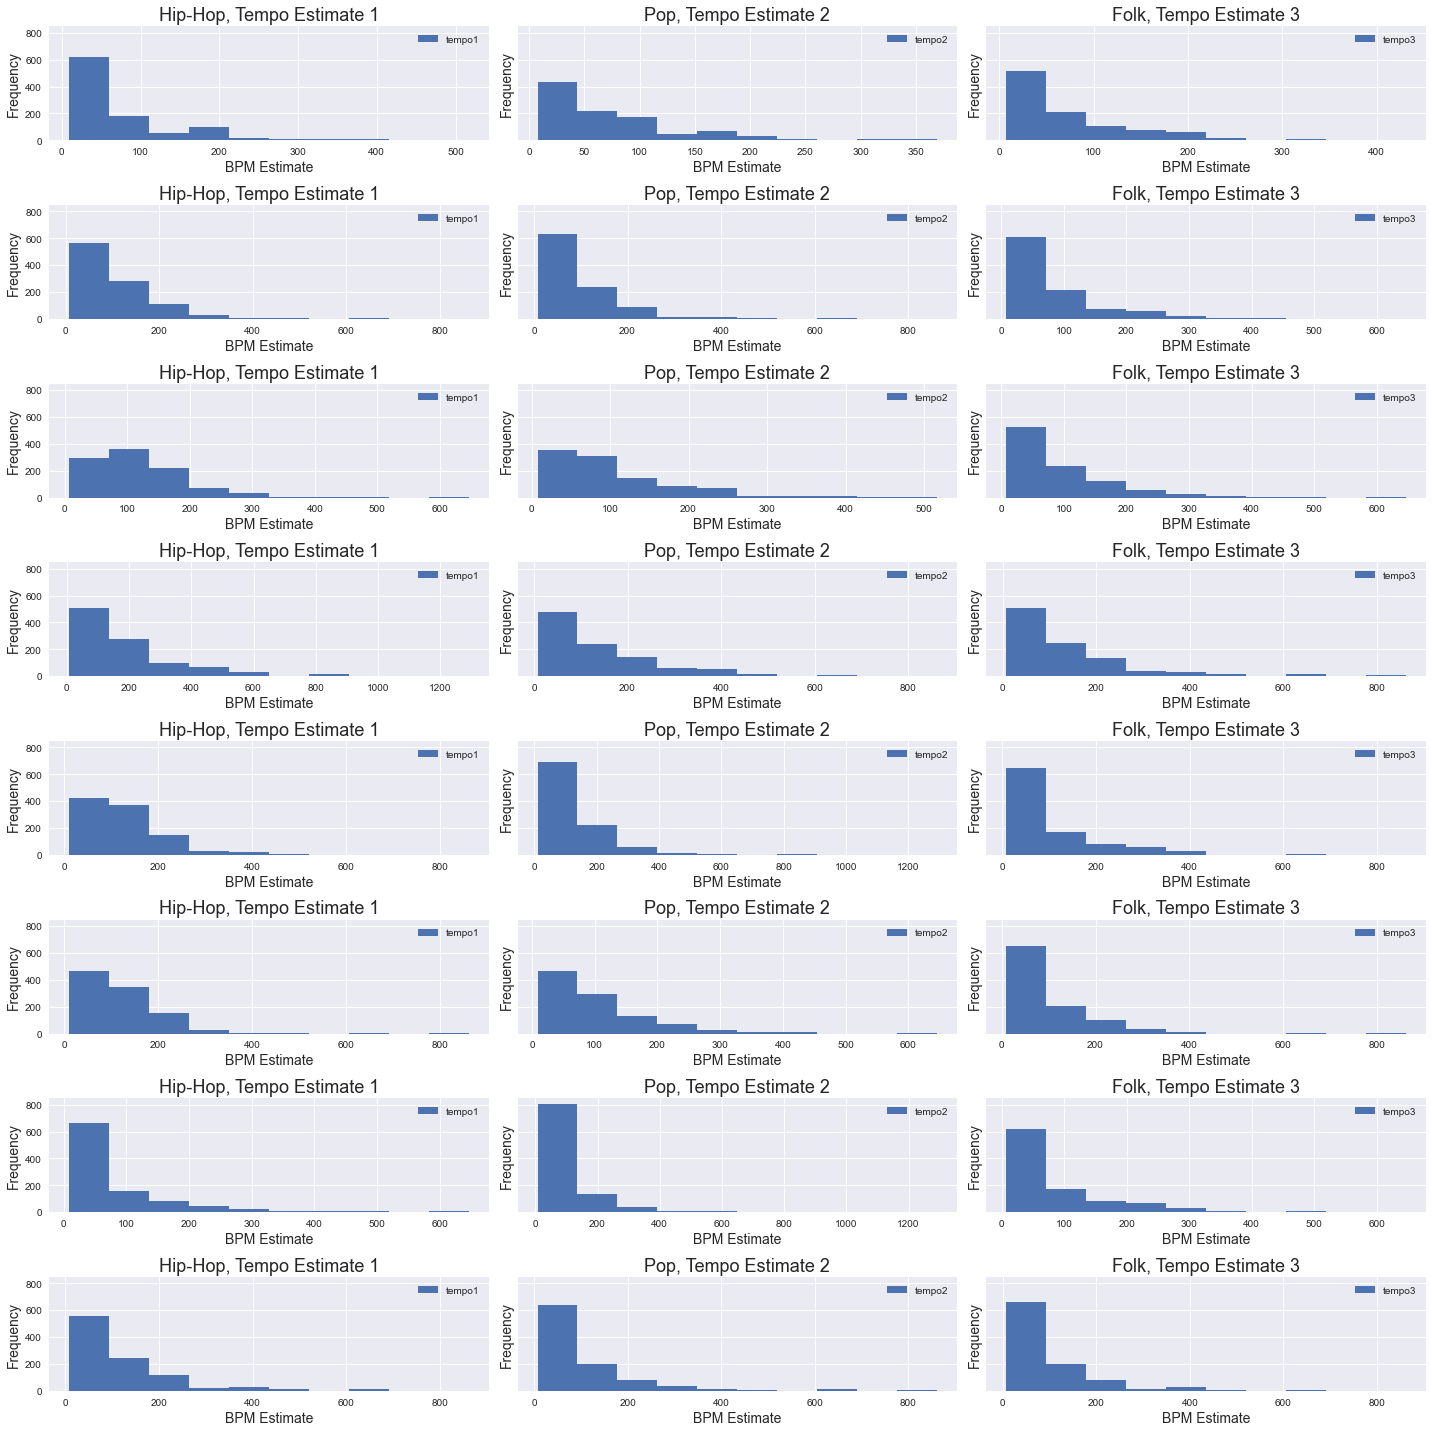

In [45]:
# Get the tempo features in their own dataframe
tempo_features = data[['genre_code', 'tempo1', 'tempo2', 'tempo3']]

# Group by genre
group = tempo_features.groupby('genre_code')

# Make a density plot
fig2, axes2 = plt.subplots(8, 3, sharey=True)
for j in range(8):
    for k in range(3):
        group.get_group(j).hist(column='tempo'+str(k+1), ax=axes2[j, k], legend=True)
        axes2[j, k].set_xlabel('BPM Estimate', fontsize=14)
        axes2[j, k].set_ylabel('Frequency', fontsize=14)
        axes2[j, k].set_title(genre_labels[k] + ', Tempo Estimate ' + str(k+1), fontsize=18)
        
plt.tight_layout()
plt.show()


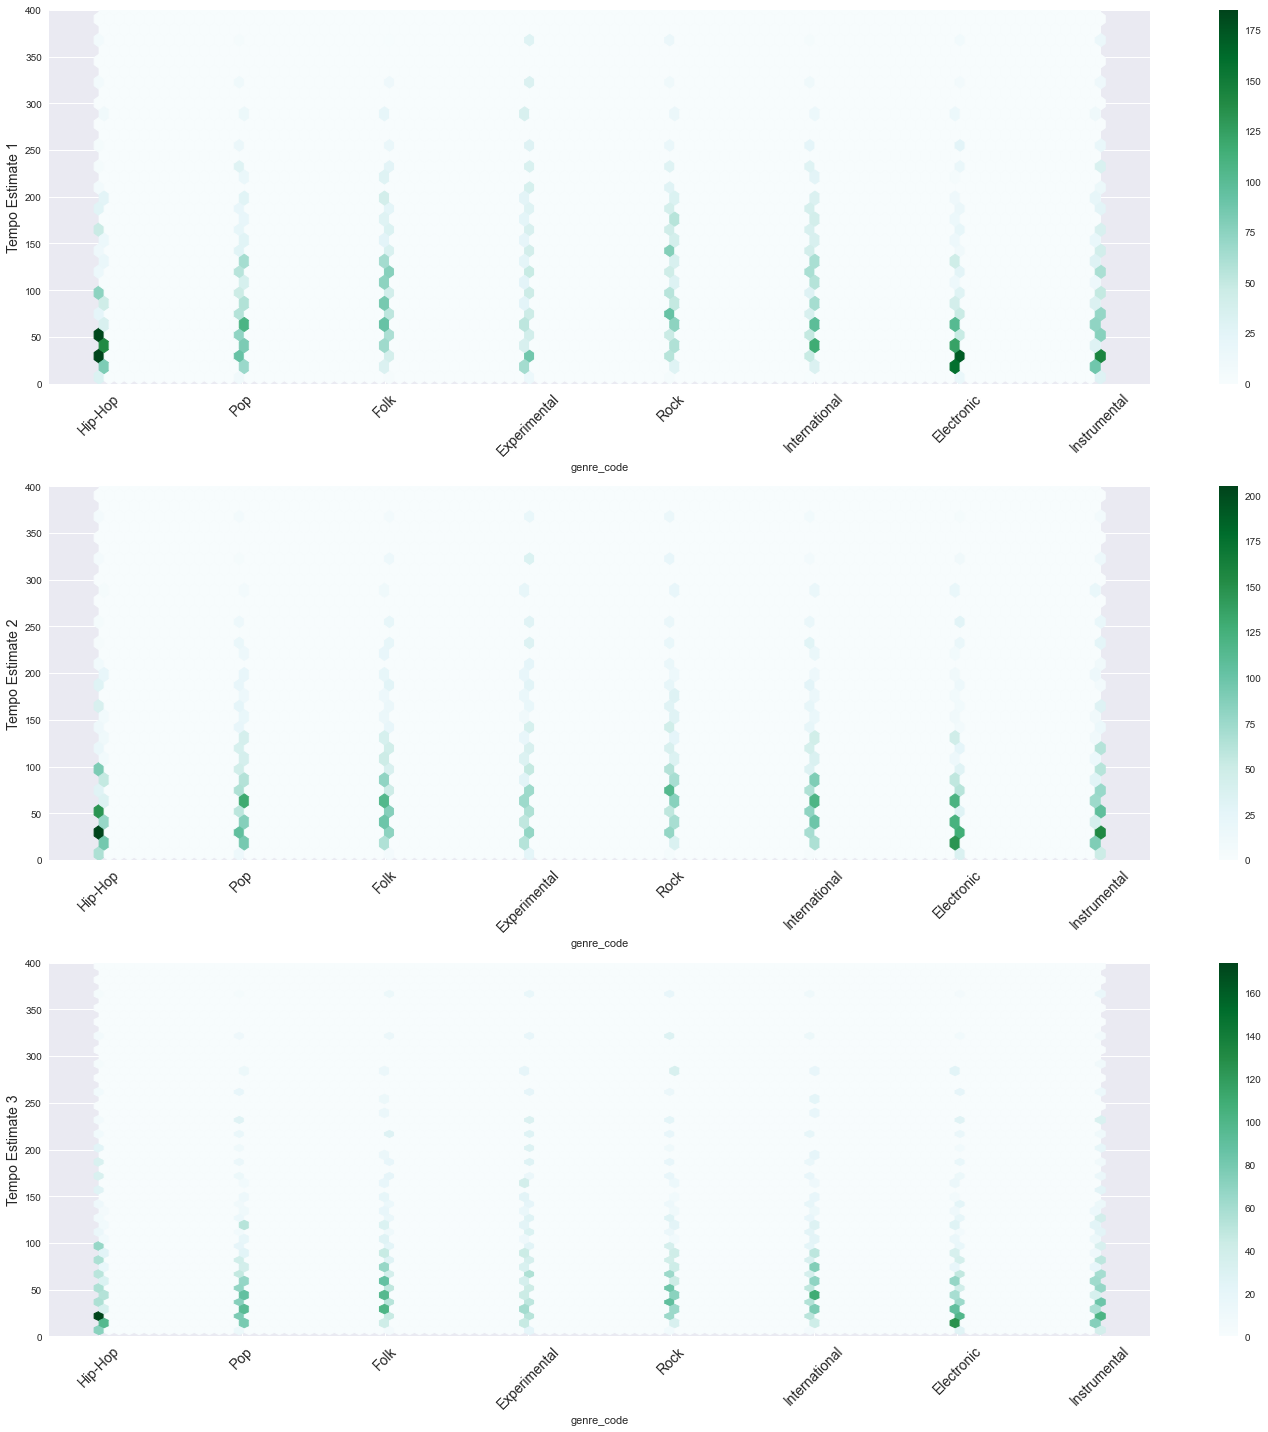

In [44]:
# Make a hexbin
fig3, axes3 = plt.subplots(3, 1)
for k in range(3):
    tempo_features.plot(ylim=[0, 400], x='genre_code', y='tempo'+str(k+1), kind='hexbin', ax=axes3[k])
    axes3[k].set_xticks([x for x in range(8)])
    axes3[k].set_xticklabels(genre_labels, rotation=45, fontsize=14)
    axes3[k].set_ylabel('Tempo Estimate ' + str(k+1), fontsize=14)
    
plt.tight_layout()
plt.show()
    

## Now try out a logreg on all the data to see how it does

In [5]:
# Import more packages
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split


In [18]:
# Read in the data and split it into training and test sets
data = pd.read_csv('./../data/features.csv')
X = data.drop(columns=['genre_code', 'track_id'])
y = data[['genre_code']]
xtrain, xtest, ytrain, ytest = train_test_split(X, y)

# Create a logistic regression object and fit the data
logreg = LogisticRegression(max_iter=1000, penalty='elasticnet', solver='saga', l1_ratio=.5)
logreg.fit(xtrain, ytrain)

# Print the mean accuracy
print(logreg.score(xtest, ytest))


C:\Users\samco\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.16758379189594796


C:\Users\samco\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [22]:
# Create a linear regression object and fit the data
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

# Print the R^2 coeff
print(linreg.score(xtest, ytest))


0.13793405135110381
